In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as prepro
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from collections import Counter

In [2]:
train = pd.read_csv('data/train.csv')
# test = pd.read_csv('test.csv')

In [3]:
X=train.copy()

In [4]:
X.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [59]:
X['year'] = pd.to_datetime(X['Dates']).dt.year
X['month'] = pd.to_datetime(X['Dates']).dt.month
X['day'] = pd.to_datetime(X['Dates']).dt.day
X['hour'] = pd.to_datetime(X['Dates']).dt.hour
X['minute'] = pd.to_datetime(X['Dates']).dt.minute
X['DayOfWeek'] = pd.to_datetime(X['Dates']).dt.weekday

test['year'] = pd.to_datetime(test['Dates']).dt.year
test['month'] = pd.to_datetime(test['Dates']).dt.month
test['day'] = pd.to_datetime(test['Dates']).dt.day
test['hour'] = pd.to_datetime(test['Dates']).dt.hour
test['minute'] = pd.to_datetime(test['Dates']).dt.minute

In [60]:
# X.DayOfWeek.unique()

In [5]:
X.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [62]:
X.describe()

,DayOfWeek,X,Y,year,month,day,hour,minute
count,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000
mean,2.992691,-122.422616,37.771020,2008.712046,6.436509,15.570623,13.412655,20.155026
std,1.972023,0.030354,0.456893,3.631194,3.428972,8.783005,6.549573,18.594915
min,0.000000,-122.513642,37.707879,2003.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,-122.432952,37.752427,2006.000000,3.000000,8.000000,9.000000,0.000000
50%,3.000000,-122.416420,37.775421,2009.000000,6.000000,16.000000,14.000000,19.000000
75%,5.000000,-122.406959,37.784369,2012.000000,9.000000,23.000000,19.000000,33.000000
max,6.000000,-120.500000,90.000000,2015.000000,12.000000,31.000000,23.000000,59.000000


In [63]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  int64  
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
 9   year        878049 non-null  int64  
 10  month       878049 non-null  int64  
 11  day         878049 non-null  int64  
 12  hour        878049 non-null  int64  
 13  minute      878049 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 93.8+ MB


In [6]:
X.duplicated().sum()

2323

In [7]:
X.drop_duplicates(inplace=True)

In [66]:
X.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
year          0
month         0
day           0
hour          0
minute        0
dtype: int64

In [67]:
X.Category.unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

In [68]:
len(X.Address.unique())

23228

In [69]:
len(X.X.unique())

34243

In [9]:
X.PdDistrict.unique()

array(['NORTHERN', 'PARK', 'INGLESIDE', 'BAYVIEW', 'RICHMOND', 'CENTRAL',
       'TARAVAL', 'TENDERLOIN', 'MISSION', 'SOUTHERN'], dtype=object)

In [8]:
df=X.copy()

In [9]:
address=df.Address.value_counts()
# df.Address=df.Address.apply(lambda x:x.strip())
# address=df.groupby('Address')['Address'].agg('count').sort_values(ascending=False)
address.head(50)

800 Block of BRYANT ST                   26245
800 Block of MARKET ST                    6576
2000 Block of MISSION ST                  5094
1000 Block of POTRERO AV                  4046
900 Block of MARKET ST                    3245
0 Block of TURK ST                        3224
0 Block of 6TH ST                         2882
300 Block of ELLIS ST                     2701
400 Block of ELLIS ST                     2584
16TH ST / MISSION ST                      2501
1000 Block of MARKET ST                   2487
1100 Block of MARKET ST                   2315
2000 Block of MARKET ST                   2166
100 Block of OFARRELL ST                  2135
700 Block of MARKET ST                    2075
3200 Block of 20TH AV                     2030
100 Block of 6TH ST                       1886
500 Block of JOHNFKENNEDY DR              1812
TURK ST / TAYLOR ST                       1810
200 Block of TURK ST                      1796
0 Block of UNITEDNATIONS PZ               1788
0 Block of PH

In [10]:
address_less1000=address[address<=1000]
print(f'total less than 1000: {len(address_less1000)}')
address_less1000

total less than 1000: 23178


1300 Block of WEBSTER ST         992
100 Block of HYDE ST             990
1000 Block of MISSION ST         985
0 Block of GROVE ST              982
400 Block of BROADWAY ST         976
                                ... 
INTERSTATE280 HY / OCEAN AV        1
23RD ST / GRANDVIEW AV             1
100 Block of RICKARD ST            1
MILTON I ROSS ST / JERROLD AV      1
19TH ST / 3RD ST                   1
Name: Address, Length: 23178, dtype: int64

In [11]:
df.Address=df.Address.apply(lambda x: 'other' if x in address_less1000 else x)

In [21]:
# df.columns=['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
#        'Resolution', 'Address', 'lat', 'lon','Block', 'Intersect']
# df.to_csv('sample.csv')

In [23]:
# df.to_csv('sample.csv')

In [15]:
len(df.Address.unique())

51

In [16]:
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",other,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",other,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",other,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,other,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,other,-122.438738,37.771541


In [17]:
df['Block'] = df['Address'].str.contains('block', case=False)
df['Intersect'] = df['Address'].str.contains('/', case=False)
df['Block']=df['Block'].replace({False:0,True:1})
df['Intersect']=df['Intersect'].replace({False:0,True:1})

In [15]:
df_1=df.copy()

In [16]:
df_1

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",other,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",other,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",other,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,other,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,other,-122.438738,37.771541
...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,other,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,other,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,other,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,other,-122.390531,37.780607


# check number of catagery

In [17]:
# df_1.Category=df_1.Category.apply(lambda x:x.strip())
# cat=df_1.groupby('Category')['Category'].agg('count').sort_values(ascending=False)
cat=X.Category.value_counts()
# cat[Cat>=53919]
cat.head(39)

LARCENY/THEFT                  174320
OTHER OFFENSES                 125960
NON-CRIMINAL                    91915
ASSAULT                         76815
DRUG/NARCOTIC                   53919
VEHICLE THEFT                   53706
VANDALISM                       44581
WARRANTS                        42145
BURGLARY                        36600
SUSPICIOUS OCC                  31394
MISSING PERSON                  25669
ROBBERY                         22988
FRAUD                           16637
FORGERY/COUNTERFEITING          10592
SECONDARY CODES                  9979
WEAPON LAWS                      8550
PROSTITUTION                     7446
TRESPASS                         7318
STOLEN PROPERTY                  4537
SEX OFFENSES FORCIBLE            4380
DISORDERLY CONDUCT               4313
DRUNKENNESS                      4277
RECOVERED VEHICLE                3132
KIDNAPPING                       2340
DRIVING UNDER THE INFLUENCE      2268
LIQUOR LAWS                      1899
RUNAWAY     

In [18]:
cat_less1000=cat[cat<53919]
print(f'total less than 1000: {len(cat_less1000)}')
cat_less1000

total less than 1000: 34


VEHICLE THEFT                  53706
VANDALISM                      44581
WARRANTS                       42145
BURGLARY                       36600
SUSPICIOUS OCC                 31394
MISSING PERSON                 25669
ROBBERY                        22988
FRAUD                          16637
FORGERY/COUNTERFEITING         10592
SECONDARY CODES                 9979
WEAPON LAWS                     8550
PROSTITUTION                    7446
TRESPASS                        7318
STOLEN PROPERTY                 4537
SEX OFFENSES FORCIBLE           4380
DISORDERLY CONDUCT              4313
DRUNKENNESS                     4277
RECOVERED VEHICLE               3132
KIDNAPPING                      2340
DRIVING UNDER THE INFLUENCE     2268
LIQUOR LAWS                     1899
RUNAWAY                         1894
ARSON                           1512
LOITERING                       1207
EMBEZZLEMENT                    1164
SUICIDE                          508
FAMILY OFFENSES                  488
B

In [19]:
for i in cat_less1000.index:
    df_1=df_1[df_1.Category!=i]
df_1

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",other,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",other,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,other,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,other,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,other,-122.403252,37.713431
...,...,...,...,...,...,...,...,...,...
878041,2003-01-06 00:31:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,RICHMOND,"ARREST, CITED",other,-122.472985,37.782552
878042,2003-01-06 00:20:00,ASSAULT,ATTEMPTED HOMICIDE WITH A GUN,Monday,BAYVIEW,"ARREST, BOOKED",other,-122.389769,37.730564
878043,2003-01-06 00:20:00,OTHER OFFENSES,PAROLE VIOLATION,Monday,BAYVIEW,"ARREST, BOOKED",other,-122.389769,37.730564
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,other,-122.447364,37.731948


In [20]:
len(df_1)

522929

In [26]:
# df_1.drop( 'Resolution',axis=1,inplace=True)

In [27]:
# df.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict', 'Address',
       'X', 'Y'],
      dtype='object')

In [33]:
# df_1.columns=['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict', 'Address',  'lat', 'lon']
# df.to_csv('sample.csv')

# divid by _groupby_*Category* and the pick 700 sample from each group

In [29]:
Categ=list(df_1.Category.unique())

In [85]:
# df_2=df_1[df_1.Category==Categ[0]].iloc[:1000]


In [30]:
total_sample_from_each_Category=5000
df_2=df_1[df_1.Category==Categ[0]].iloc[:total_sample_from_each_Category]
for i in Categ:
    if list(df_1.Category.unique())[0]!=i:
        df_2=pd.concat([df_2,df_1[df_1.Category==i].iloc[:total_sample_from_each_Category]],ignore_index=True)
df_2

,Dates,Category,Descript,DayOfWeek,PdDistrict,Address,lat,lon
0,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,other,-122.425892,37.774599
1,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,other,-122.424363,37.800414
2,2015-05-13 22:30:00,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Wednesday,TARAVAL,other,-122.487983,37.737667
3,2015-05-13 21:40:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,BAYVIEW,other,-122.386401,37.738983
4,2015-05-13 20:56:00,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Wednesday,TARAVAL,other,-122.499787,37.748518
...,...,...,...,...,...,...,...,...
24995,2013-07-09 13:32:00,DRUG/NARCOTIC,POSSESSION OF CONTROLLED SUBSTANCE FOR SALE,Tuesday,TENDERLOIN,other,-122.414218,37.783259
24996,2013-07-09 13:32:00,DRUG/NARCOTIC,SALE OF CONTROLLED SUBSTANCE,Tuesday,TENDERLOIN,other,-122.414218,37.783259
24997,2013-07-09 13:05:00,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Tuesday,SOUTHERN,other,-122.420010,37.770110
24998,2013-07-09 13:00:00,DRUG/NARCOTIC,POSSESSION OF MARIJUANA,Tuesday,SOUTHERN,100 Block of 6TH ST,-122.407877,37.780388


In [31]:
shuffled = df_2.sample(frac=1,ignore_index=True)
shuffled

,Dates,Category,Descript,DayOfWeek,PdDistrict,Address,lat,lon
0,2015-03-06 00:25:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Friday,RICHMOND,other,-122.453172,37.781715
1,2014-08-08 23:00:00,ASSAULT,BATTERY,Friday,SOUTHERN,other,-122.414027,37.771864
2,2015-03-07 00:41:00,NON-CRIMINAL,AIDED CASE,Saturday,PARK,other,-122.434769,37.772571
3,2015-02-02 22:30:00,NON-CRIMINAL,CASE CLOSURE,Monday,RICHMOND,other,-122.476440,37.783318
4,2015-03-17 12:11:00,NON-CRIMINAL,LOST PROPERTY,Tuesday,SOUTHERN,other,-122.403161,37.783691
...,...,...,...,...,...,...,...,...
24995,2013-11-12 21:06:00,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,Tuesday,NORTHERN,other,-122.417594,37.784015
24996,2014-07-21 18:22:00,DRUG/NARCOTIC,SALE OF BASE/ROCK COCAINE,Monday,TENDERLOIN,other,-122.415128,37.779787
24997,2015-04-27 20:20:00,ASSAULT,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,Monday,PARK,700 Block of STANYAN ST,-122.453513,37.768697
24998,2015-02-17 09:30:00,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Tuesday,TENDERLOIN,other,-122.412597,37.783932


In [32]:
df=shuffled.copy()

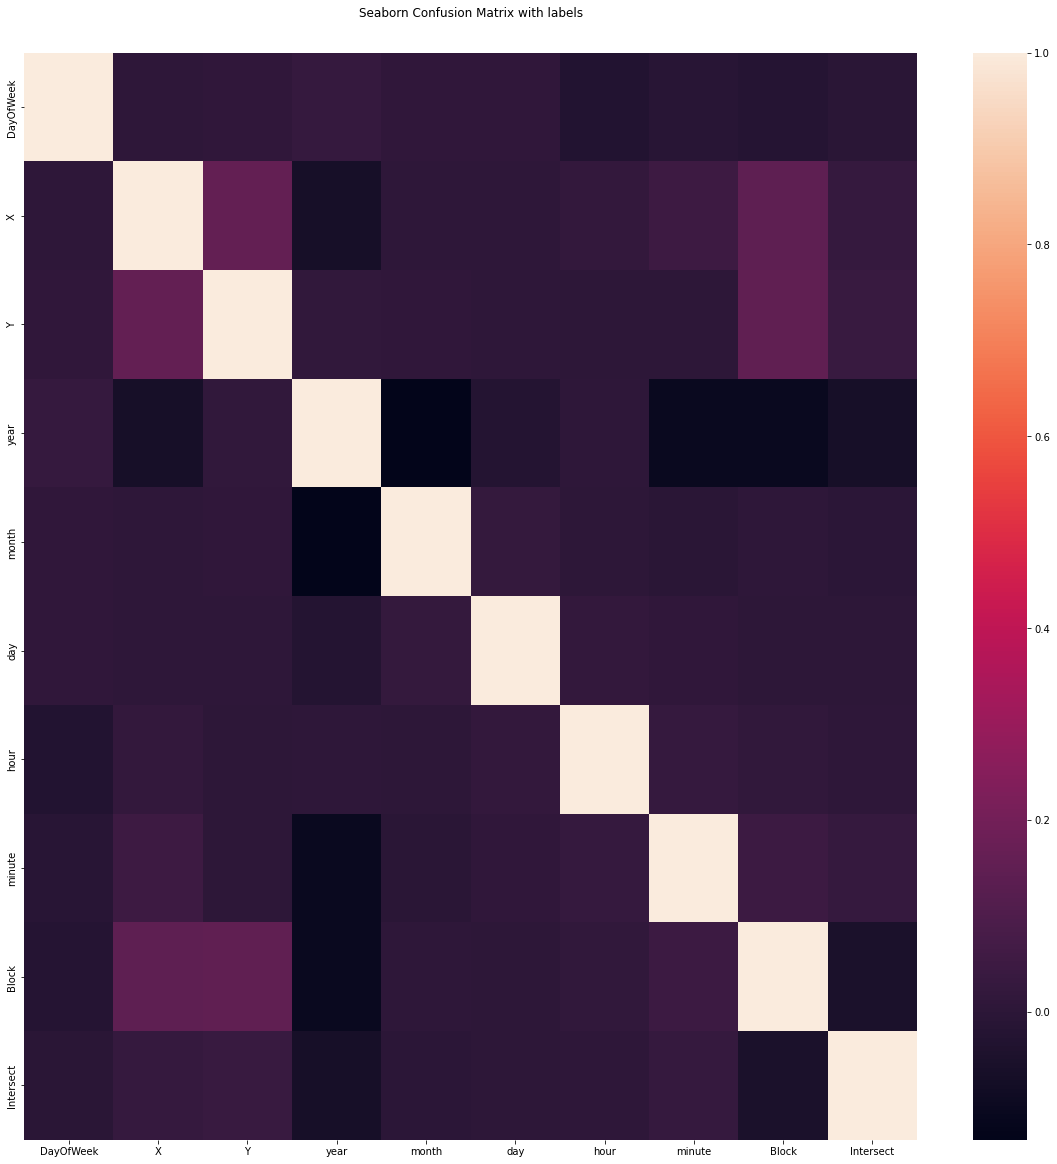

In [89]:
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20, 20]
# labels = ['True Neg','False Pos','False Neg','True Pos']

# labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(df.corr(), fmt='',)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
# ax.set_xlabel('\nPredicted Values')
# ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
# ax.xaxis.set_ticklabels(['False','True'])
# ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [90]:
dumies=pd.get_dummies(df.Address)
dumies

,0 Block of 6TH ST,0 Block of JONES ST,0 Block of OFARRELL ST,0 Block of PHELAN AV,0 Block of POWELL ST,0 Block of TURK ST,0 Block of UNITEDNATIONS PZ,100 Block of 6TH ST,100 Block of EDDY ST,100 Block of GOLDEN GATE AV,...,700 Block of STANYAN ST,800 Block of BRYANT ST,800 Block of MARKET ST,900 Block of MARKET ST,900 Block of POTRERO AV,ELLIS ST / JONES ST,MISSION ST / 16TH ST,TURK ST / LEAVENWORTH ST,TURK ST / TAYLOR ST,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
249996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
249997,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
249998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [91]:
dumies1=pd.get_dummies(df.PdDistrict)
dumies1

,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
249995,0,0,0,0,1,0,0,0,0,0
249996,0,0,0,0,0,0,1,0,0,0
249997,0,0,0,0,0,0,0,1,0,0
249998,0,1,0,0,0,0,0,0,0,0


In [92]:
# dumies2=pd.get_dummies(df.DayOfWeek)
# dumies2

In [93]:
df1=pd.concat([df,dumies.drop('other',axis=1),dumies1.drop('PARK',axis=1)],axis=1)
df1.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,...,TURK ST / TAYLOR ST,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
0,2015-01-25 09:45:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,6,BAYVIEW,NONE,other,-122.390348,37.739264,2015,...,0,1,0,0,0,0,0,0,0,0
1,2013-08-25 02:07:00,OTHER OFFENSES,PAROLE VIOLATION,6,NORTHERN,"ARREST, BOOKED",other,-122.431952,37.779565,2013,...,0,0,0,0,0,1,0,0,0,0
2,2014-09-19 14:00:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,4,SOUTHERN,NONE,other,-122.412483,37.770631,2014,...,0,0,0,0,0,0,0,1,0,0
3,2008-11-11 13:40:00,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,1,SOUTHERN,"ARREST, CITED",800 Block of MARKET ST,-122.407634,37.784189,2008,...,0,0,0,0,0,0,0,1,0,0
4,2007-07-11 19:00:00,DRUG/NARCOTIC,POSSESSION OF HEROIN FOR SALES,2,TENDERLOIN,"ARREST, BOOKED",other,-122.412414,37.783004,2007,...,0,0,0,0,0,0,0,0,0,1


In [94]:
columns=df1.columns
columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'year', 'month', 'day', 'hour',
       'minute', 'Block', 'Intersect', '0 Block of 6TH ST',
       '0 Block of JONES ST', '0 Block of OFARRELL ST', '0 Block of PHELAN AV',
       '0 Block of POWELL ST', '0 Block of TURK ST',
       '0 Block of UNITEDNATIONS PZ', '100 Block of 6TH ST',
       '100 Block of EDDY ST', '100 Block of GOLDEN GATE AV',
       '100 Block of LEAVENWORTH ST', '100 Block of OFARRELL ST',
       '100 Block of POWELL ST', '100 Block of TAYLOR ST',
       '100 Block of TURK ST', '1000 Block of MARKET ST',
       '1000 Block of POTRERO AV', '1100 Block of MARKET ST',
       '1200 Block of MARKET ST', '1400 Block of PHELPS ST',
       '1600 Block of THE EMBARCADERONORTH ST', '16TH ST / MISSION ST',
       '200 Block of EDDY ST', '200 Block of INTERSTATE80 HY',
       '200 Block of TURK ST', '2000 Block of MARKET ST',
       '2000 Block of MISSION ST', '2300 Blo

In [95]:
x=df1.drop(['Dates', 'Category', 'Descript', 'PdDistrict',
       'Resolution', 'Address'],axis=1)
x

,DayOfWeek,X,Y,year,month,day,hour,minute,Block,Intersect,...,TURK ST / TAYLOR ST,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
0,6,-122.390348,37.739264,2015,1,25,9,45,0,0,...,0,1,0,0,0,0,0,0,0,0
1,6,-122.431952,37.779565,2013,8,25,2,7,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4,-122.412483,37.770631,2014,9,19,14,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,-122.407634,37.784189,2008,11,11,13,40,1,0,...,0,0,0,0,0,0,0,1,0,0
4,2,-122.412414,37.783004,2007,7,11,19,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,3,-122.422010,37.780113,2003,12,11,21,27,0,0,...,0,0,0,0,0,1,0,0,0,0
249996,4,-122.491389,37.783905,2014,1,24,8,30,0,0,...,0,0,0,0,0,0,1,0,0,0
249997,1,-122.403405,37.775421,2010,3,23,12,30,1,0,...,0,0,0,0,0,0,0,1,0,0
249998,1,-122.405927,37.797278,2012,5,29,18,10,0,0,...,0,0,1,0,0,0,0,0,0,0


In [96]:
y=df1.Category
y1=pd.DataFrame(y)
y1

,Category
0,LARCENY/THEFT
1,OTHER OFFENSES
2,LARCENY/THEFT
3,DRUG/NARCOTIC
4,DRUG/NARCOTIC
...,...
249995,DRUG/NARCOTIC
249996,OTHER OFFENSES
249997,ASSAULT
249998,ASSAULT


In [97]:
y1['Category_Label'] = prepro.LabelEncoder().fit_transform(y1.Category)
z=y1.copy()
z

,Category,Category_Label
0,LARCENY/THEFT,2
1,OTHER OFFENSES,4
2,LARCENY/THEFT,2
3,DRUG/NARCOTIC,1
4,DRUG/NARCOTIC,1
...,...,...
249995,DRUG/NARCOTIC,1
249996,OTHER OFFENSES,4
249997,ASSAULT,0
249998,ASSAULT,0


In [98]:
z=z.drop_duplicates(keep='first')
z

,Category,Category_Label
0,LARCENY/THEFT,2
1,OTHER OFFENSES,4
3,DRUG/NARCOTIC,1
5,NON-CRIMINAL,3
11,ASSAULT,0


In [99]:
label_df=z
# label_df.to_csv('Result.csv')

In [100]:
# y = to_categorical(prepro.LabelEncoder().fit_transform(y1.Category))
# y
y1

,Category,Category_Label
0,LARCENY/THEFT,2
1,OTHER OFFENSES,4
2,LARCENY/THEFT,2
3,DRUG/NARCOTIC,1
4,DRUG/NARCOTIC,1
...,...,...
249995,DRUG/NARCOTIC,1
249996,OTHER OFFENSES,4
249997,ASSAULT,0
249998,ASSAULT,0


In [101]:
x_train, x_val, y_train, y_val = train_test_split(x, y1.Category_Label, random_state=0, test_size=0.3)

In [102]:
x_train.shape

(175000, 69)

In [48]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_model=BaggingClassifier(
base_estimator=DecisionTreeClassifier(),
n_estimators=100,
max_samples=0.8,
oob_score=True)
bag_model.fit(x_train,y_train)
bag_model.oob_score_

0.5583542857142857

In [49]:
bag_model.score(x_val,y_val)

0.5624

In [50]:
import joblib
joblib.dump(bag_model,'bag_model56.pkl')

['bag_model56.pkl']

In [103]:
import joblib
model=joblib.load('bag_model56.pkl')
model.score(x_train,y_train)

0.8383771428571428

In [ ]:
import sklearn as sk
cnf=sk.metrics.confusion_matrix(y_val,model.predict(x_val))
cnf

In [ ]:
import seaborn as sn
# labels = ['True Neg','False Pos','False Neg','True Pos']

# labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cnf,fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['ASSAULT','DRUG/NARCOTIC','LARCENY/THEFT','NON-CRIMINAL','OTHER OFFENSES'])
ax.yaxis.set_ticklabels(['ASSAULT','DRUG/NARCOTIC','LARCENY/THEFT','NON-CRIMINAL','OTHER OFFENSES'])

## Display the visualization of the Confusion Matrix.
# plt.show()
plt.savefig("Predict56_without_anote.svg")

In [ ]:
plt.savefig("test.svg")

In [52]:
column={'data_columns':[i for i in x_train.columns]}

In [53]:
import json
with open('column.json', 'w') as f:
    json.dump(column, f)

# End 

In [54]:
    from sklearn.naive_bayes import GaussianNB
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report

In [55]:
clasifier=[['naive_bayes :',GaussianNB()],['DecisionTree :',DecisionTreeClassifier()],['LogisticRegression :',LogisticRegression(max_iter=1000)]]

In [148]:
from sklearn.ensemble import VotingClassifier
clf1=GaussianNB()
clf2=DecisionTreeClassifier()
clf3=LogisticRegression(max_iter=100000,verbose=2)
eclf1=VotingClassifier(estimators=[('Gaussian',clf1),('DecisionTree',clf2),('LogisticReg',clf3)])
eclf1.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 158.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 158.7min finished


VotingClassifier(estimators=[('Gaussian', GaussianNB()),
                             ('DecisionTree', DecisionTreeClassifier()),
                             ('LogisticReg',
                              LogisticRegression(max_iter=100000, verbose=2))])

In [149]:
eclf1.predict(x_val)

array([ 7, 13, 15, ..., 12, 17, 17])

In [150]:
import joblib
joblib.dump(eclf1,'eclf1_model.pkl')

['eclf1_model.pkl']

In [151]:
import joblib
cl=joblib.load('eclf1_model.pkl')

In [152]:
pre=cl.predict(x_val)

In [153]:
y_val

8225     13
10794    13
9163     27
26591    12
6631     24
         ..
21914    22
17453    10
20344    18
1878     17
6465      5
Name: Category_Label, Length: 9000, dtype: int32

In [154]:
import sklearn as sk
cnf=sk.metrics.confusion_matrix(y_val, pre)
cnf

array([[ 82,   1,   8,  10,  17,   7,   7,  32,   4,   2,   6,   3,  13,
         20,   1,   1,   0,  33,   3,   0,  24,   0,   0,   1,   0,   0,
          0,   4,   0,   0],
       [  4,  78,  16,   3,   1,  23,   5,   0,   2,   9,   3,  26,   0,
          0,  13,   7,  10,  36,   0,   2,   0,   1,   1,   0,   5,   3,
          4,  38,   1,   1],
       [  1,  18,  73,   1,   3,  12,   2,   0,   4,  23,   1,  19,   1,
          0,  12,   1,  10,  29,   1,   3,   0,   1,   0,   2,  11,   1,
          2,  69,   3,   0],
       [ 21,   2,  14,  91,  15,   4,  25,  11,   4,   9,   8,   0,  11,
          9,   4,   1,   1,  77,   2,   0,  10,   1,   0,   0,   3,   0,
          0,   0,   0,   0],
       [ 53,   6,   9,  16,  75,   1,  21,   8,   8,   2,  11,   1,  14,
          0,   0,   1,   3,  70,  10,   0,  17,   0,   1,   0,   1,   0,
          1,   1,   1,   3],
       [  2,  15,  27,  12,   3, 135,  11,   0,   4,   9,   6,   5,   3,
          0,   2,   3,   4,  30,   6,   3,   3,   2,

In [155]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20, 20]

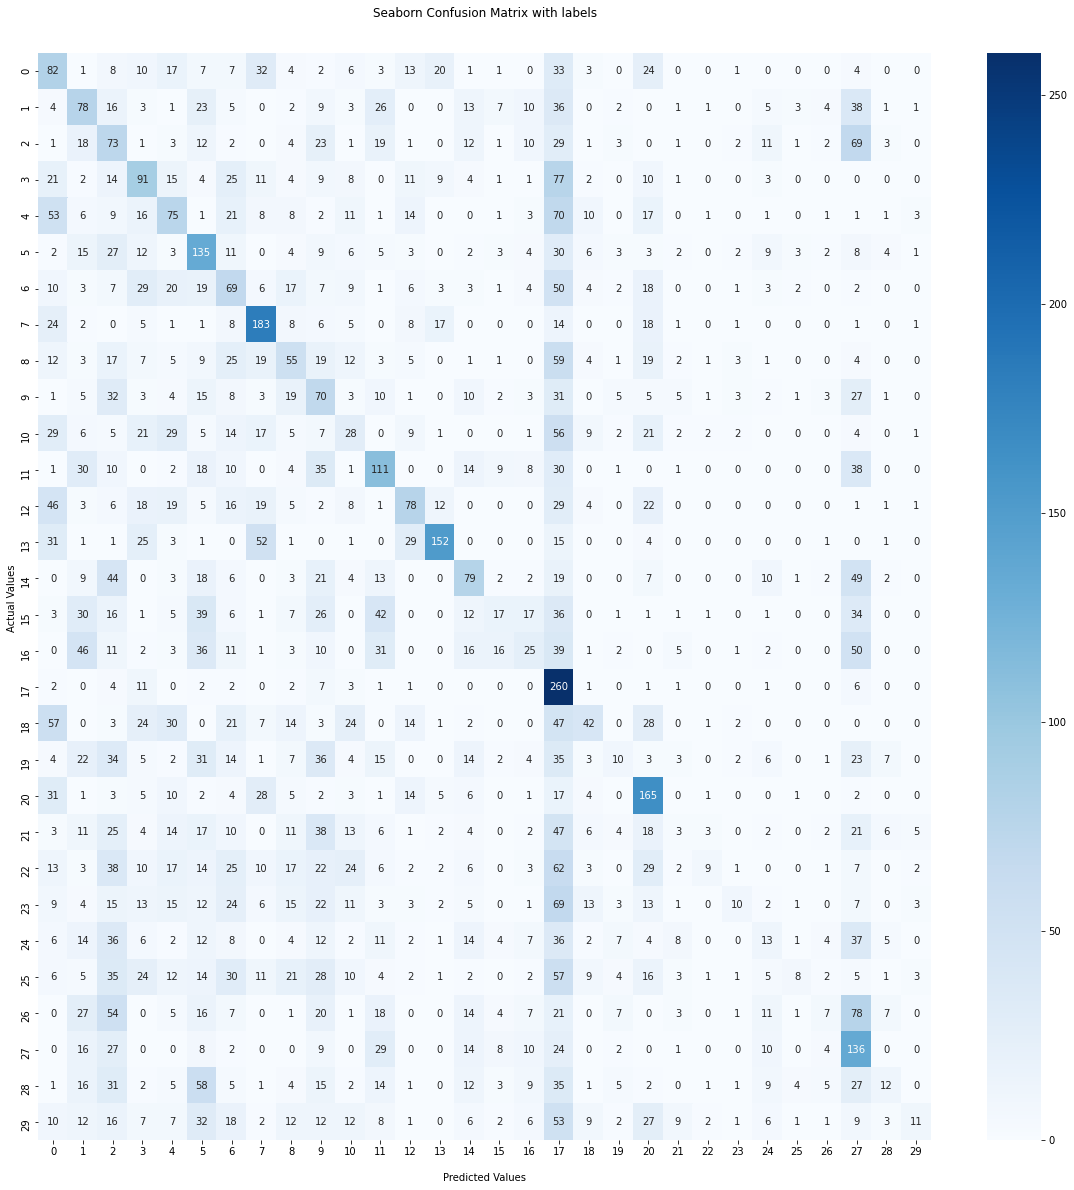

In [156]:
import seaborn as sn
# labels = ['True Neg','False Pos','False Neg','True Pos']

# labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cnf,annot=True, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
# ax.xaxis.set_ticklabels(['False','True'])
# ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [157]:
eclf1.score(x_val,y_val)

0.2318888888888889

In [158]:
x_train.head(1)

,X,Y,year,month,day,hour,minute,0 Block of 6TH ST,0 Block of JONES ST,0 Block of OFARRELL ST,...,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday
15925,-122.413354,37.769075,2014,11,16,7,30,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [159]:
len(x_val.columns[7:-6])

59

In [160]:
import json

In [162]:
column={'data_columns':[i for i in x_train.columns]}

In [163]:
with open('column.json', 'w') as f:
    json.dump(column, f)

In [164]:
data_columns=json.load(f)['data_columns']
data_columns

ValueError: I/O operation on closed file.